In [1]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from glob import glob
import os
import numpy as np
import torch
import h5py

/home/somahansel/anaconda3/envs/mnist_test/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
train_data_path = 'data/train'
val_data_path = 'data/val/images'
test_data_path = 'data/test/images'

train_path_list = glob(os.path.join(train_data_path, '*', 'images', '*'))
train_path_list.sort()
val_path_list = glob(os.path.join(val_data_path, '*'))
val_path_list.sort()
tst_path_list = glob(os.path.join(test_data_path, '*'))
tst_path_list.sort()

In [8]:
trn_lables = [os.path.split(path)[-1][:9] for path in train_path_list]
print(trn_lables[500])

n01629819


In [9]:
with open('data/val/val_annotations.txt') as f:
    lines = f.readlines()
    val_tuples = [line.split("\t")[:2] for line in lines]

In [11]:
trn_images = np.zeros((100000, 64, 64, 3), dtype=np.float32)
val_images = np.zeros((10000, 64, 64, 3), dtype=np.float32)
tst_images = np.zeros((10000, 64, 64, 3), dtype=np.float32)

for i, path in enumerate(train_path_list):
    image = Image.open(path)
    data = np.asarray(image)
    if len(data.shape) == 2:
        data = np.stack([data, data, data], axis=2)
    trn_images[i] = data

for i, tuple in enumerate(val_tuples):
    path = os.path.join(val_data_path, tuple[0])
    image = Image.open(path)
    data = np.asarray(image)
    if len(data.shape) == 2:
        data = np.stack([data, data, data], axis=2)
    val_images[i] = data

for i, path in enumerate(tst_path_list):
    image = Image.open(path)
    data = np.asarray(image)
    if len(data.shape) == 2:
        data = np.stack([data, data, data], axis=2)
    tst_images[i] = data

In [ ]:
trn_mean = np.mean(trn_images, axis=(0, 1, 2))
trn_std = np.std(trn_images, axis=(0, 1, 2))

val_mean = np.mean(val_images, axis=(0, 1, 2))
val_std = np.std(val_images, axis=(0, 1, 2))

tst_mean = np.mean(tst_images, axis=(0, 1, 2))
tst_std = np.std(tst_images, axis=(0, 1, 2))

In [ ]:
image = Image.open('data/train/n01629819/images/n01629819_0.JPEG')
np_data = np.asarray(image)
print(np_data.shape)
print(image.format)
print(image.size)
print(image.mode)
pyplot.imshow(image)
pyplot.show()

In [ ]:
image = trn_images[500]
print(image.dtype)
pyplot.imshow(image.astype(int))
pyplot.show()

n01629819


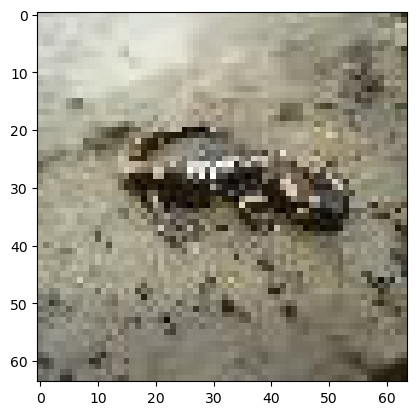

In [6]:
f = h5py.File('data/tiny_imagenet_trn.hdf5', 'r')
data = f['data']
labels = f['labels']
strings = labels.asstr()[()]
image = np.asarray(data[500])
label = strings[500]
print(label)
pyplot.imshow(image.astype(int))
pyplot.show()

In [5]:
f = h5py.File('data/tiny_imagenet_val.hdf5', 'r')
labels = f['labels']
strings = labels.asstr()[()]
label = strings[500]
print(label)

n02002724
